In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
%matplotlib inline

### Attention Scoring

In [0]:
# inputs to the scoring function in the decoding phase
dec_hidden_state = [5, 1, 20]

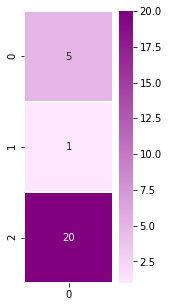

In [31]:
# visualise decoder hidden state
plt.figure(figsize=(2, 5))
sns.heatmap(np.transpose(np.matrix(dec_hidden_state)), annot=True, cmap=sns.light_palette("purple", as_cmap=True), linewidths=1)
plt.show()

In [0]:
# encoder hidden state
annotation = [3, 12, 45]

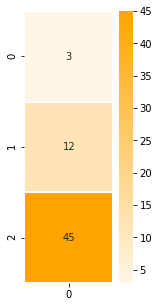

In [33]:
plt.figure(figsize=(2, 5))
sns.heatmap(np.transpose(np.matrix(annotation)), annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)
plt.show()

### Annotation Matrix

In [34]:
def single_dot_attention_score(dec_hidden_state, enc_hidden_state):
    return np.dot(dec_hidden_state, enc_hidden_state)

single_dot_attention_score(dec_hidden_state, annotation)

927

In [0]:
annotations = np.transpose([[3,12,45], [59,2,5], [1,43,5], [4,3,45.3]])

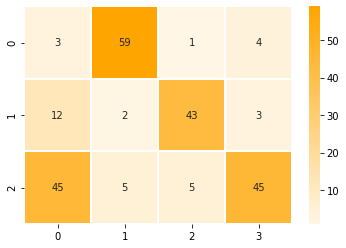

In [36]:
ax = sns.heatmap(annotations, annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)

In [37]:
def dot_attention_score(dec_hidden_state, annotations):
    return np.matmul(np.transpose(dec_hidden_state), annotations)

attention_weights_raw = dot_attention_score(dec_hidden_state, annotations)
attention_weights_raw

array([927., 397., 148., 929.])

### Softmax

In [38]:
def softmax(x):
    x = np.array(x, dtype=np.float128)
    e_x = np.exp(x)
    return e_x /e_x.sum(axis=0)

attention_weights = softmax(attention_weights_raw)
attention_weights

array([1.19202922e-001, 7.94715151e-232, 5.76614420e-340, 8.80797078e-001],
      dtype=float128)

### Applying Attention Scores

In [39]:
def apply_attention_scores(attention_weights, annotations):
    return attention_weights * annotations

applied_attention = apply_attention_scores(attention_weights, annotations)
applied_attention

array([[3.57608766e-001, 4.68881939e-230, 5.76614420e-340,
        3.52318831e+000],
       [1.43043506e+000, 1.58943030e-231, 2.47944200e-338,
        2.64239123e+000],
       [5.36413149e+000, 3.97357575e-231, 2.88307210e-339,
        3.99001076e+001]], dtype=float128)

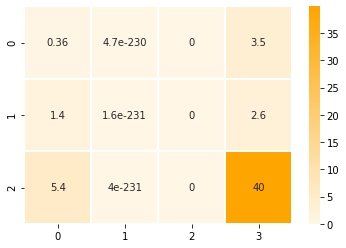

In [40]:
ax = sns.heatmap(applied_attention, annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)

### Attention Context Vector

In [41]:
def attention_vector(applied_attention):
    return np.sum(applied_attention, axis=1)

attention_vector = attention_vector(applied_attention)
attention_vector

array([ 3.88079708,  4.0728263 , 45.26423912], dtype=float128)

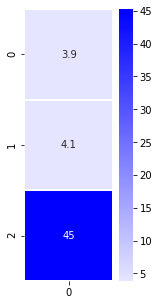

In [42]:
plt.figure(figsize=(2, 5))
sns.heatmap(np.transpose(np.matrix(attention_vector)), annot=True, cmap=sns.light_palette("Blue", as_cmap=True), linewidths=1)
plt.show()